<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_6231/NGC_6231_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 5.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 53.5MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=5a834b3780ecffad530fe783163f02788e481e811b97af34381537be110c96a8
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC6231 center

coordinate = coord.SkyCoord.from_name('NGC6231')
print(coordinate)
radius = u.Quantity(1, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (253.535458, -41.826667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 5966509846818679680,5966509846818679680,1361430196,2015.5,253.535948,0.129177,-41.828117,0.101217,0.373578,0.109698,3.405523,-0.251845,0.303577,-2.123356,0.177563,0.543667,0.280317,-0.585969,-0.507726,0.059835,-0.583171,-0.779288,-0.322748,0.024545,0.605362,170,0,170,0,2.905045,222.783508,0.323814,2.596213,31,False,2.333645,1.413386,0.022658,0.190977,...,4514.689181,851.515446,5.301946,15.625350,2.803340,0,0.745122,-0.622978,1.368100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459247,1.185433,257.084064,-19.124220,102011,5095.633301,4297.5,6938.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001498
1,1635721458409799680,Gaia DR2 5966509851108054016,5966509851108054016,111247073,2015.5,253.533661,0.400825,-41.825672,0.424710,-0.745005,0.652348,-1.142036,-2.222224,1.098430,-6.834229,1.054830,-0.060677,0.309571,0.159486,0.270091,-0.647966,-0.220034,-0.585373,0.290158,0.684820,0.604562,116,0,115,1,2.225698,145.619812,1.076680,1.766340,31,False,0.159604,1.353609,0.104962,0.016528,...,550.797062,30.571649,18.016596,17.909441,3.044842,0,0.624971,-0.775417,1.400389,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.460069,1.188297,257.081964,-19.121996,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001671
2,1635721458409799680,Gaia DR2 5966509846818678528,5966509846818678528,1212321597,2015.5,253.534740,2.762316,-41.828398,2.171251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,0,70,2,4.288782,126.146980,1.594898,7.140488,3,False,0.212628,NaN,NaN,0.214469,...,1413.189375,18.443649,76.622009,16.886419,2.236178,0,1.848509,0.344460,1.504049,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458461,1.185955,257.083154,-19.124606,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001818
3,1635721458409799680,Gaia DR2 5966509851122012288,5966509851122012288,1592357776,2015.5,253.534654,13.799354,-41.829497,4.608760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79,0,77,2,3.241103,117.390808,1.090626,4.188075,3,False,0.319843,NaN,NaN,0.118872,...,1213.376667,189.336804,6.408562,17.051931,2.098466,0,1.798573,0.375666,1.422907,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.457567,1.185312,257.083224,-19.125705,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002898
4,1635721458409799680,Gaia DR2 5966509782401686400,5966509782401686400,1496891344,2015.5,253.538409,7.983613,-41.828788,2.592427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.772609,NaN,NaN,NaN,N

##### Applying Filter:

In [108]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [187]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [188]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [189]:
all_stars_filtered.shape

(56196, 99)

##### Visualizing GAIA data

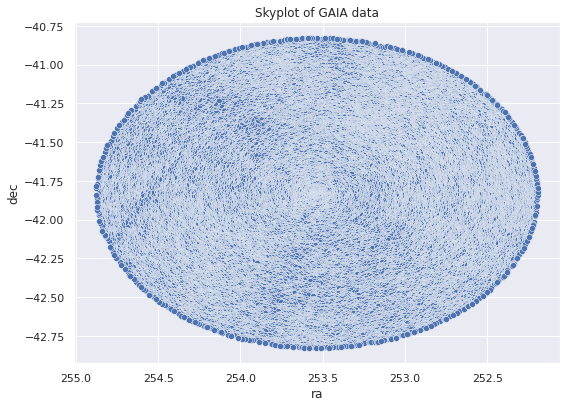

In [190]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [191]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [192]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [193]:
## saving only NGC 6231 data from Cantat GAIA DR2 paper

cantat_6231 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_6231")
cantat_6231 = cantat_6231[0].to_pandas()
cantat_6231

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,253.132848,-41.861961,5965017465938774912,0.6620,-0.563,-2.369,NaN,14.281500,1.2256,0.7,NGC_6231,253.132851,-41.861951
1,253.201303,-41.955200,5965015919750155776,0.5506,-0.890,-2.207,NaN,13.564100,0.8036,0.4,NGC_6231,253.201309,-41.955191
2,253.168852,-41.849690,5965017397219299456,0.7014,-0.938,-2.106,NaN,15.016800,1.3637,0.5,NGC_6231,253.168857,-41.849681
3,253.195016,-41.919190,5965016405090411904,0.4986,-0.456,-2.189,NaN,16.772200,1.8739,0.6,NGC_6231,253.195019,-41.919181
4,253.169682,-41.909035,5965016783047540608,0.5738,-0.563,-1.944,NaN,15.530700,1.6979,0.4,NGC_6231,253.169685,-41.909027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,253.799898,-42.188102,5966448003577519616,0.5505,-0.183,-2.782,NaN,17.665400,1.7170,0.2,NGC_6231,253.799899,-42.188090
1576,253.928626,-42.079932,5966453054470707072,0.6383,-0.194,-1.632,NaN,17.237301,2.8719,0.1,NGC_6231,253.928627,-42.079925
1577,253.841437,-42.065966,5966450340039976064,0.4553,-1.162,-2.968,NaN,17.821899,1.9168,0.2,NGC_6231,253.841444,-42.065953
1578,253.802264,-42.156706,5966450374411114752,0.6002,-0.381,-2.346,NaN,14.170600,1.0223,1.0,NGC_6231,253.802266,-42.156696


In [194]:
# renaming the cantat table to match it with gaia_data
cantat_6231 = cantat_6231.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [195]:
# taking the subset of only source_id and PMemb
cantat_6231 = cantat_6231.loc[:,['source_id', 'PMemb']]


In [196]:
# join the two table on source_id
cantat_6231 = all_stars_filtered.join(cantat_6231.set_index('source_id'), on='source_id')

In [197]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_6231 = cantat_6231.dropna(subset=['PMemb'])
cantat_6231

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
10,1635721458409799680,Gaia DR2 5966509885480902656,5966509885480902656,75674766,2015.5,253.541922,0.056999,-41.825049,0.043726,0.588630,0.058279,10.100193,-0.201992,0.109771,-2.076847,0.074812,0.125070,-0.217714,-0.378112,-0.167505,-0.118284,-0.103722,-0.684189,-0.034273,0.221695,0.002434,262,262,247,15,23.867315,1236.423462,0.180424,12.504582,31,False,25.615211,1.680406,0.011212,0.109587,...,5.785701,1.167947,0,0.298518,0.111281,0.187237,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464436,1.183913,257.088354,-19.120643,100001,7947.000000,7780.500000,8207.500000,0.2653,0.0740,0.6331,0.1430,0.0366,0.3428,200111,50.211166,47.074417,52.383160,9059.582031,7871.937500,10247.226562,https://gea.esac.esa.int/data-server/datalink/...,,0.005073,1.840123,27.760835,0.8
19,1635721458409799680,Gaia DR2 5966509846818671872,5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,9.281498,1.170590,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459803,1.192602,257.077960,-19.119925,100002,8385.000000,8145.500000,8634.250000,0.8830,0.7589,1.0181,0.4583,0.3856,0.5190,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005984,7.472460,33.461019,0.6
29,1635721458409799680,Gaia DR2 5966509885480897792,5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,9.886769,1.174598,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464262,1.180180,257.091598,-19.122782,100001,8046.500000,7834.000000,8446.000000,0.6690,0.4880,1.0634,0.3483,0.2662,0.5140,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007647,6.887798,26.786451,0.5
33,1635721458409799680,Gaia DR2 5966509782401678592,5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,12.925723,1.211719,0,0.516440,0.171193,0.345247,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458147,1.178751,257.089426,-19.128715,100001,7098.75

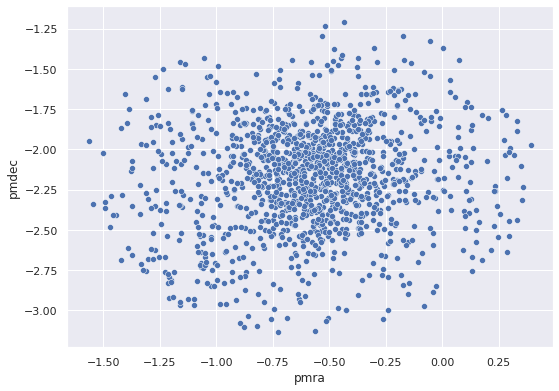

In [198]:
sns.scatterplot(x='pmra', y='pmdec', data=cantat_6231)

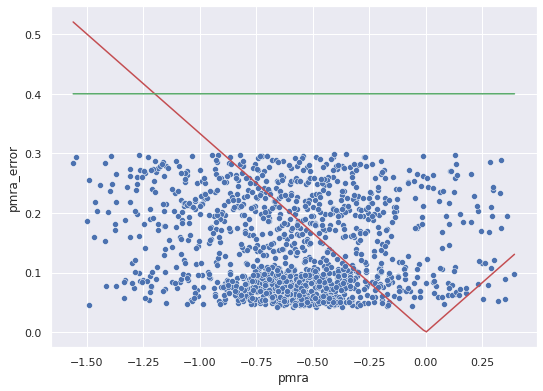

In [199]:
sns.scatterplot(x='pmra', y='pmra_error', data=cantat_6231)
sns.lineplot(x=cantat_6231.pmra, y=abs(cantat_6231.pmra/3), color='r')
sns.lineplot(x=cantat_6231.pmra, y=0.4, color='g')

In [200]:
(cantat_6231.pmra_error > 0.3).value_counts()

False    1354
Name: pmra_error, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


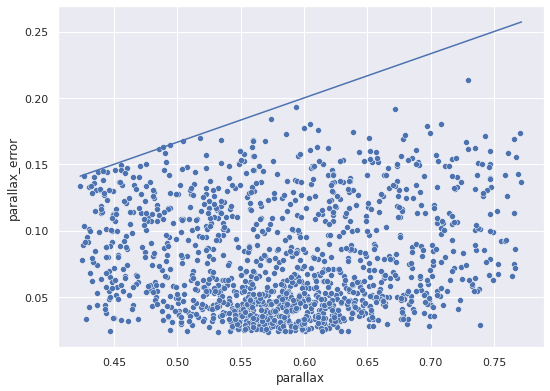

In [201]:
sns.scatterplot(x='parallax', y='parallax_error', data=cantat_6231)
sns.lineplot(cantat_6231.parallax, cantat_6231.parallax/3)

In [202]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_6231.to_csv('NGC_6231_cantat.csv')
# all_stars.to_csv('NGC_6231_Gaia_30m.csv')

In [203]:
cantat_6231.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,1.354000e+03,1.354000e+03,1.354000e+03,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,...,1.347000e+03,1347.000000,1347.000000,1347.000000,1347.000000,1354.000000,1347.000000,1347.000000,1347.000000,9.000000,9.000000,1354.000000,9.000000,9.000000,9.000000,1354.000000,1354.000000,1354.000000,1354.000000,1068.000000,1068.000000,1068.000000,1068.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,1.635721e+18,5.966757e+18,8.643134e+08,2015.5,253.535883,0.066499,-41.796216,0.055566,0.583401,0.077106,9.969189,-0.581009,0.138488,-2.172717,0.098448,0.072449,-0.177469,-0.315211,-0.088598,-0.275319,-0.004994,-0.719266,-0.146822,0.365097,-0.000030,203.661004,36.044313,201.873708,1.787297,2.051913,270.559235,0.083740,1.554940,31.0,63.427616,1.490260,0.013432,0.093926,23.248154,11.200148,...,2.259199e+05,637.479297,461.250977,14.278122,1.332238,0.121861,1.460608,0.674017,0.786590,-40.064345,2.654596,0.038405,4944.444336,3.055556,-0.166667,343.483758,1.205508,257.079965,-19.092692,100100.383895,5225.137695,5002.307617,5565.795410,1.841518,1.531017,2.149076,0.927435,0.765244,1.086938,200111.0,3.651327,3.259030,3.949239,68.250198,58.908226,77.592224,0.219791,5.728750,29.146004,0.521786
std,0.000000e+00,1.042475e+15,4.736171e+08,0.0,0.225540,0.033183,0.193087,0.027528,0.078508,0.040418,5.288498,0.343077,0.076567,0.325692,0.051476,0.177117,0.150538,0.182438,0.149644,0.146635,0.160238,0.080739,0.125803,0.124043,0.229977,29.495980,80.394681,28.793315,2.925124,6.025174,307.027496,0.140059,9.858707,0.0,103.836403,0.124774,0.007334,0.055001,3.362835,0.887942,...,1.709026e+06,5339.917237,398.968384,1.985957,0.133295,0.338351,0.691354,0.408829,0.302204,43.334732,4.961407,0.512953,634.647766,0.166667,0.500000,0.168690,0.192644,0.182289,0.189425,434.526034,1389.434326,1346.609741,1420.679199,0.738869,0.755823,0.752854,0.375546,0.381554,0.387274,0.0,4.277451,3.951248,4.514437,534.412964,459.990906,609.025757,0.134632,4.056905,15.638530,0.308043
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.281842,0.018408,0.423228,0.023844,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.867894,-0.750324,

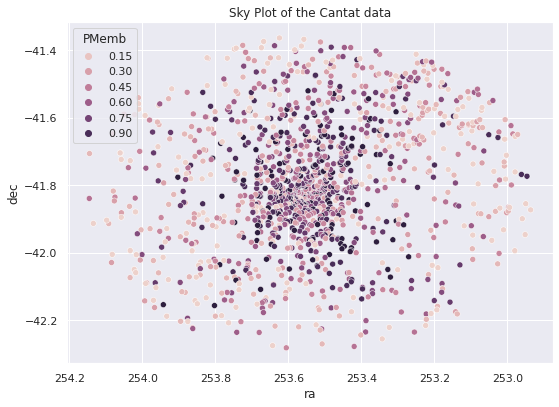

In [204]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_6231['ra'], y = cantat_6231['dec'], 
                          hue = cantat_6231['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [205]:
# import member dataset
member = cantat_6231.copy()

In [206]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_6231_center'] = distance

In [207]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_6231_center)
cantat_radius

0.47053977168757954

In [208]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
10,1635721458409799680,Gaia DR2 5966509885480902656,5966509885480902656,75674766,2015.5,253.541922,0.056999,-41.825049,0.043726,0.588630,0.058279,10.100193,-0.201992,0.109771,-2.076847,0.074812,0.125070,-0.217714,-0.378112,-0.167505,-0.118284,-0.103722,-0.684189,-0.034273,0.221695,0.002434,262,262,247,15,23.867315,1236.423462,0.180424,12.504582,31,False,25.615211,1.680406,0.011212,0.109587,...,0,0.298518,0.111281,0.187237,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464436,1.183913,257.088354,-19.120643,100001,7947.00,7780.5,8207.500000,0.2653,0.0740,0.6331,0.1430,0.0366,0.3428,200111,50.211166,47.074417,52.383160,9059.582031,7871.937500,10247.226562,https://gea.esac.esa.int/data-server/datalink/...,,0.005073,1.840123,27.760835,0.8,0.005081,1
19,1635721458409799680,Gaia DR2 5966509846818671872,5966509846818671872,994196143,2015.5,253.528953,0.042003,-41.823165,0.035386,0.500177,0.045313,11.038198,-0.618120,0.082720,-2.014752,0.060212,-0.022583,-0.186666,-0.400981,-0.029362,-0.225033,0.053416,-0.741887,-0.073413,0.306280,-0.143106,251,251,242,9,15.661293,766.168457,0.059859,1.374822,31,True,123.496727,1.711654,0.008832,0.089753,...,1,0.266615,0.095115,0.171500,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.459803,1.192602,257.077960,-19.119925,100002,8385.00,8145.5,8634.250000,0.8830,0.7589,1.0181,0.4583,0.3856,0.5190,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005984,7.472460,33.461019,0.6,0.005981,1
29,1635721458409799680,Gaia DR2 5966509885480897792,5966509885480897792,311166037,2015.5,253.545663,0.054755,-41.827538,0.041098,0.522328,0.056883,9.182508,-0.739185,0.107318,-1.904268,0.071091,0.187194,-0.318994,-0.248488,-0.154496,-0.269648,-0.010938,-0.723689,-0.108310,0.321772,0.060399,214,214,204,10,15.438690,691.698792,0.087285,2.596582,31,False,77.344505,1.668033,0.010306,0.174881,...,0,0.344581,0.125320,0.219260,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.464262,1.180180,257.091598,-19.122782,100001,8046.50,7834.0,8446.000000,0.6690,0.4880,1.0634,0.3483,0.2662,0.5140,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.007647,6.887798,26.786451,0.5,0.007654,1
33,1635721458409799680,Gaia DR2 5966509782401678592,5966509782401678592,1377352669,2015.5,253.541979,0.034195,-41.833184,0.026995,0.555860,0.040938,13.577954,-0.352738,0.086079,-1.966265,0.044477,-0.285745,-0.232036,-0.156301,0.074591,0.112695,-0.028142,-0.646295,0.319773,0.021373,-0.109480,129,0,129,0,-1.312545,103.863762,0.000000,0.000000,31,False,115.166115,1.674507,0.006070,-0.040703,...,0,0.516440,0.171193,0.345247,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.458147,1.178751,257.089426,-19.128715,100001,7098.75,6948.5,7812.333496,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.258261,1.864560,2.356980,11.6673

In [209]:
### adding their distance from the center of the clusters

## NGC 6231
center = coord.SkyCoord.from_name('NGC6231')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_6231_center'] = distance

In [210]:
non_member = all_stars_filtered[all_stars_filtered['dist_6231_center'] >= 0.95].sample(len(member), random_state = 42)

In [211]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member
588911,1635721458409799680,Gaia DR2 5966244319055229696,5966244319055229696,937640723,2015.5,254.587100,0.049206,-42.373428,0.040598,0.676049,0.051799,13.051442,1.780621,0.100996,2.142980,0.073311,0.057345,-0.080792,-0.462004,-0.067800,-0.191096,-0.009300,-0.697491,-0.036410,0.175363,-0.137117,213,0,211,2,5.450584,336.696686,0.201838,4.082372,31,False,9.359118,1.331346,0.009748,0.068560,...,1.420018,1,2.405465,1.285106,1.120359,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.522001,0.235866,257.972020,-19.575570,100002,3750.333252,3571.000000,4166.149902,2.628,2.4279,2.8448,1.3433,1.2516,1.4645,200111,3.449631,2.795392,3.804808,2.120897,1.765621,2.476172,https://gea.esac.esa.int/data-server/datalink/...,,0.952772,17.630570,29.231225,0.950027,0
606982,1635721458409799680,Gaia DR2 5966267679376451712,5966267679376451712,822736415,2015.5,254.668857,0.124781,-42.301685,0.097197,0.498668,0.124031,4.020523,1.395802,0.250100,2.301445,0.167659,0.176970,-0.073071,-0.479575,-0.172298,-0.102357,-0.126285,-0.726962,-0.098748,0.180187,0.041787,211,0,211,0,3.730638,290.541840,0.322394,1.916649,31,False,1.522453,1.287410,0.021743,0.118125,...,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.615762,0.233002,258.027226,-19.497516,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.966237,5.580965,13.726935,0.963508,0
638105,1635721458409799680,Gaia DR2 5969606346433415936,5969606346433415936,752274115,2015.5,252.792798,0.098513,-41.009225,0.093854,0.425510,0.124311,3.422960,-1.938814,0.203620,-1.171308,0.158317,0.121902,0.061467,-0.421970,-0.118360,-0.470811,-0.038739,-0.808447,-0.280041,0.534335,0.009353,222,0,221,1,1.655857,251.537964,0.164723,0.611291,31,False,2.180285,1.415991,0.020004,0.117336,...,1.391094,0,1.867834,0.874577,0.993258,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,343.739482,2.135521,256.394704,-18.379215,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.989119,9.521740,7.398520,0.991098,0
609063,1635721458409799680,Gaia DR2 5968053943430053504,5968053943430053504,739267759,2015.5,252.238634,0.120042,-41.886961,0.104925,0.475423,0.136426,3.484828,-4.981968,0.228346,-2.559431,0.167996,-0.246240,-0.192680,-0.304602,0.074248,-0.231801,0.069147,-0.769844,-0.067061,0.390315,-0.208908,177,0,174,3,2.915669,227.656967,0.313559,2.129812,31,False,2.130384,1.393489,0.023956,-0.040807,...,1.724804,0,1.536757,0.397585,1.139172,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,342.798571,1.893182,256.076444,-19.302374,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.967772,21.817651,15.235092,0.967319,0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


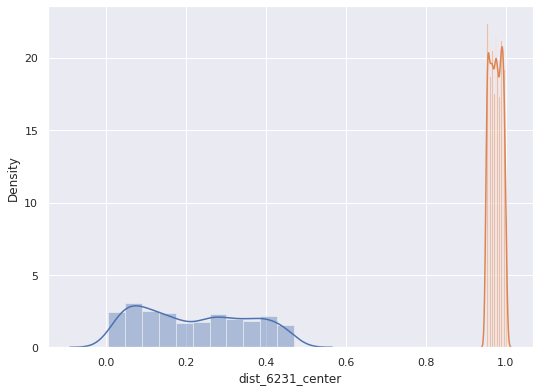

In [212]:
sns.distplot(member['dist_6231_center'])
sns.distplot(non_member['dist_6231_center'])
plt.show()

In [213]:
training_data = pd.concat([member, non_member])

In [214]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,2.708000e+03,2.708000e+03,2.708000e+03,2708.0,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.0,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,...,2688.000000,2688.000000,2688.000000,2708.000000,2688.000000,2688.000000,2688.000000,44.000000,44.000000,2708.000000,44.000000,44.000000,44.000000,2708.000000,2708.000000,2708.000000,2708.000000,2042.000000,2042.000000,2042.000000,2042.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,1383.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,2708.000000,2708.000000,2708.000000,1354.000000,2708.000000,2708.000000
mean,1.635721e+18,5.967047e+18,8.516725e+08,2015.5,253.484107,0.073627,-41.792254,0.061003,0.636011,0.083659,9.938783,-1.203386,0.149705,-3.130296,0.106300,0.073560,-0.158123,-0.346969,-0.098297,-0.260602,-0.019680,-0.728210,-0.150574,0.349008,-0.014375,205.417651,20.989660,203.976366,1.441285,2.039271,272.966156,0.102859,2.148585,31.0,40.338825,1.463484,0.014640,0.089942,23.436484,11.318316,...,421.826538,14.762226,1.348306,0.115583,1.614301,0.760128,0.854172,-28.314123,1.524341,0.087888,4886.363770,3.181818,-0.034091,343.460943,1.237073,257.038923,-19.094439,100096.136631,4820.283203,4613.530273,5148.317383,1.812079,1.529897,2.101047,0.910720,0.762674,1.059395,200111.0,3.274184,2.908842,3.545002,42.323040,36.463760,48.182365,0.597229,14.029192,39.157581,0.521786,0.597308,0.500000
std,0.000000e+00,1.379961e+15,4.844889e+08,0.0,0.670121,0.034170,0.506325,0.027979,0.401731,0.040186,9.171806,3.027086,0.073142,5.027579,0.050074,0.168164,0.151849,0.172564,0.151390,0.148307,0.165363,0.075270,0.112643,0.125747,0.213482,26.248357,63.579653,25.850530,2.336937,5.976360,315.590332,0.155054,10.330224,0.0,83.990242,0.109156,0.007209,0.050180,2.985996,0.802106,...,360.434723,1.726300,0.131417,0.338854,0.639090,0.398923,0.262349,32.785156,2.493266,0.781926,548.397583,0.445793,0.226134,0.478548,0.526350,0.535090,0.500273,425.531492,1162.060181,1131.273193,1185.901978,0.775688,0.787557,0.785784,0.395339,0.397665,0.404033,0.0,4.031614,3.665316,4.312732,410.505859,353.336334,467.822876,0.389460,27.173661,68.755322,0.308043,0.389521,0.500092
min,1.635721e+18,5.964736e+18,1.457640e+05,2015.5,252.202036,0.021023,-42.822051,0.018216,0.205937,0.022623,3.001803,-56.300507,0.042337,-184.863000,0.031494,-0.869595,-0.850281,-0.911893,-0.867894,-0.750324,-0.807853,-0.97

In [215]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [216]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,2708.000000,2708.000000,2708.000000
mean,0.636011,-1.203385,-3.130298
std,0.401731,3.027085,5.027578
min,0.205937,-56.300507,-184.863007
25%,0.505556,-1.523710,-3.118002
50%,0.582741,-0.671613,-2.268645
75%,0.671879,-0.328458,-1.892344
max,11.901221,22.449291,7.037913


In [217]:
targets.value_counts()

1    1354
0    1354
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


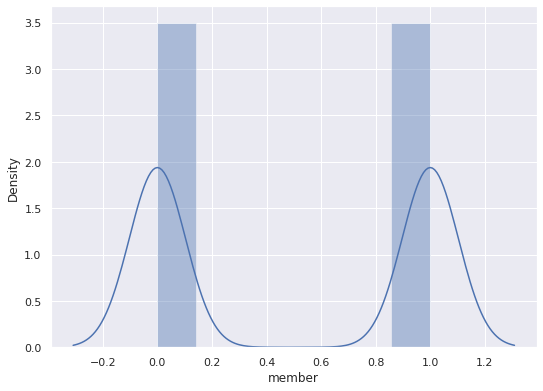

In [218]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

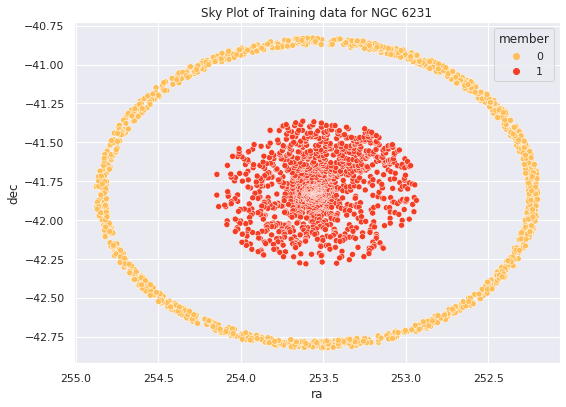

In [219]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 6231')
plt.show()

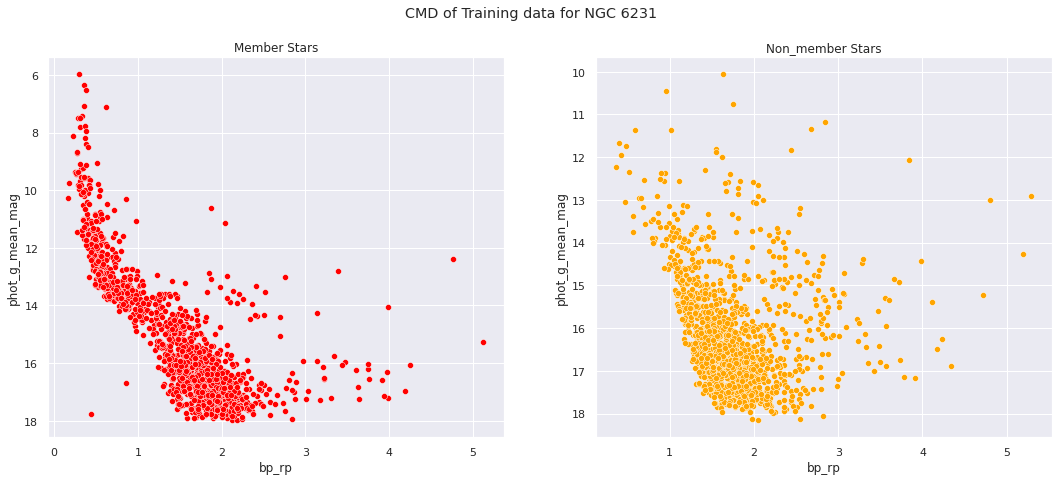

In [220]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 6231 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


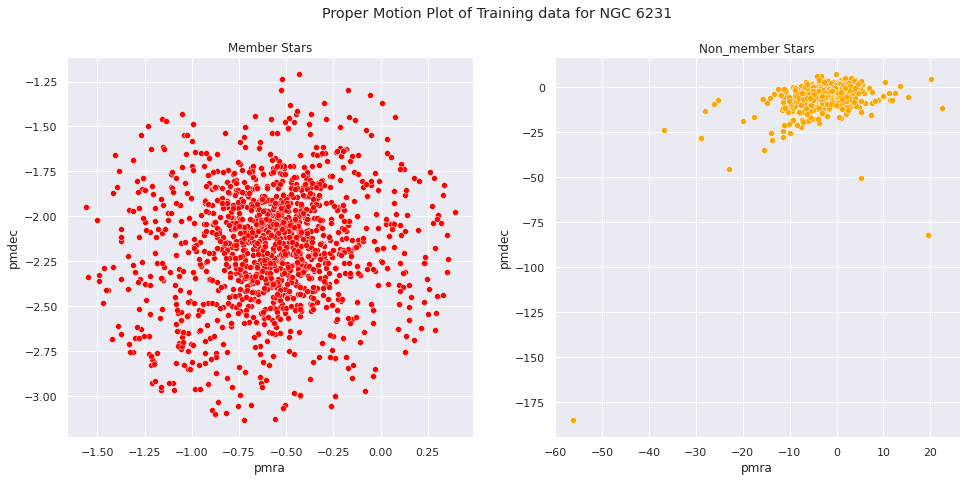

In [221]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 6231 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


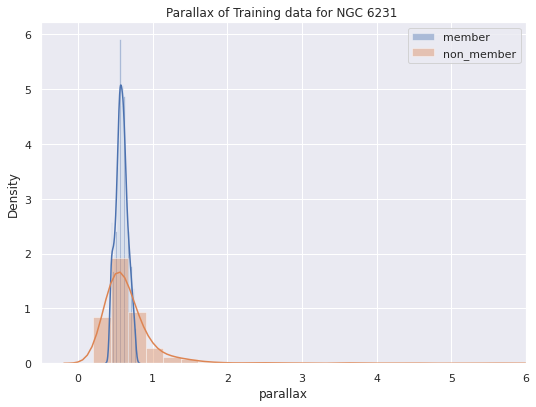

In [222]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 6231 ')
plt.legend()
plt.show()

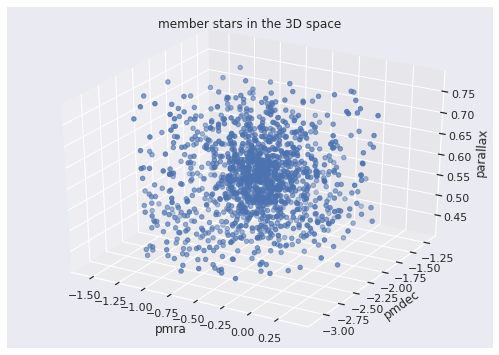

In [223]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


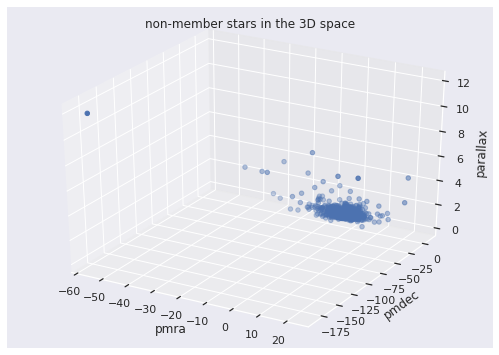

In [224]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [225]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [226]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec       0.416661
pmra        0.389292
parallax    0.194047
dtype: float64

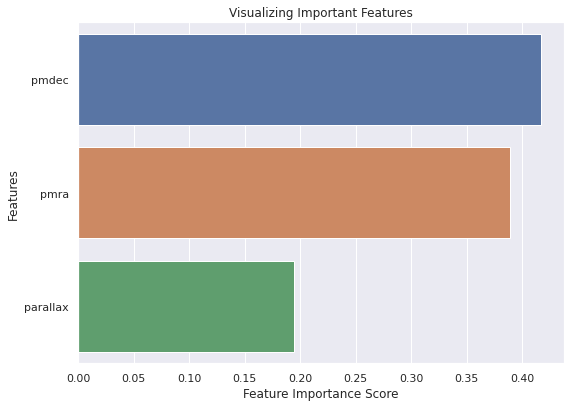

In [227]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [229]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [230]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [231]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [232]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [233]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [234]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 800}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.910
Accuracy on test data: 0.941


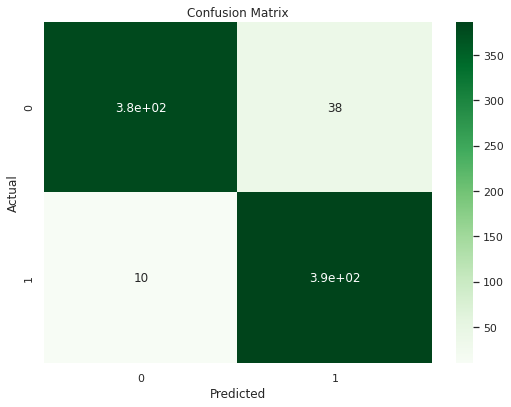

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       417
           1       0.91      0.97      0.94       396

    accuracy                           0.94       813
   macro avg       0.94      0.94      0.94       813
weighted avg       0.94      0.94      0.94       813



In [235]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.958
Precision on testing data: 0.915
Accuracy on test data: 0.945


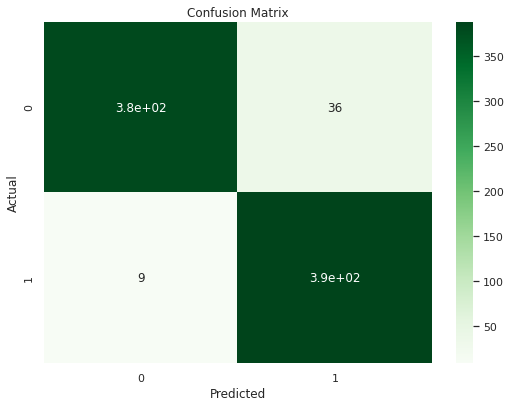

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       417
           1       0.91      0.98      0.95       396

    accuracy                           0.94       813
   macro avg       0.95      0.95      0.94       813
weighted avg       0.95      0.94      0.94       813



In [236]:
best_random = rfc_random.best_estimator_

evaluate_model(best_random)


### Prediction for the new stars

In [237]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center
count,5.619600e+04,5.619600e+04,5.619600e+04,56196.0,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,5.619600e+04,56196.0,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,56196.000000,...,5.570100e+04,55701.000000,55701.000000,55701.000000,55701.000000,56196.000000,55701.000000,55705.000000,55701.000000,1554.000000,1554.000000,56196.000000,1554.000000,1554.000000,1554.000000,56196.000000,56196.000000,56196.000000,56196.000000,41915.000000,41915.000000,41915.000000,41915.000000,20018.000000,20018.000000,20018.000000,20018.000000,20018.000000,20018.000000,25801.0,25801.000000,25801.000000,25801.000000,25801.000000,25801.000000,25801.000000,56196.000000,56196.000000,56196.000000,56196.000000
mean,1.635721e+18,5.967271e+18,8.420908e+08,2015.5,253.458188,0.077681,-41.793836,0.063657,0.691416,0.086532,10.203478,-1.760140,0.159291,-3.878783,0.111055,0.045939,-0.169626,-0.365905,-0.073447,-0.224395,-0.000132,-0.729591,-0.132067,0.318325,-0.030099,203.892786,8.148035,202.807655,1.085131,1.838369,262.556702,0.107898,2.321183e+00,31.0,20.292183,1.441143,0.015029,0.082998,23.268934,11.304452,...,3.725931e+04,98.878720,392.791840,15.124999,1.357106,0.115506,1.741034,0.832596,0.908428,-23.810262,1.745981,0.143266,4917.953613,3.181789,-0.031853,343.447534,1.250956,257.018877,-19.098347,100083.683765,4423.672852,4230.858398,4735.378418,1.767787,1.511141,2.045183,0.885297,0.752512,1.028575,200111.0,2.833983,2.494058,3.082242,9.337444,7.838020,10.836875,0.671011,22.412991,48.243403,0.671022
std,0.000000e+00,1.512607e+15,4.893739e+08,0.0,0.678771,0.032391,0.495726,0.026362,0.517994,0.037482,11.143177,4.325536,0.069956,5.400559,0.046981,0.181484,0.147926,0.164568,0.170091,0.155692,0.181555,0.073140,0.122661,0.133195,0.211470,25.012486,40.426252,24.847770,1.640926,5.513213,284.371002,0.155221,9.165107e+00,0.0,53.491276,0.085079,0.006595,0.049283,2.846597,0.777453,...,5.554088e+05,2712.329362,314.099335,1.328618,0.115619,0.340865,0.546848,0.369292,0.196475,35.806330,2.545301,0.939751,602.453247,0.402741,0.216509,0.480846,0.520171,0.539921,0.491351,397.874253,638.614319,644.810120,637.577332,0.808764,0.829275,0.809661,0.411351,0.418815,0.415397,0.0,3.963933,3.484570,4.327753,204.975281,159.880325,250.883438,0.236043,38.481822,73.673435,0.236060
min,1.635721e+18,5.964736e+18,2.682300e+04,2015.5,252.194072,0.020794,-42.825986,0.017924,0

In [238]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_6231_center'] <= cantat_radius*2]

In [239]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [240]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [241]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [242]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    45689
1     2710
Name: member, dtype: int64

In [243]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

2710

In [244]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

2710

In [245]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member,PMemb
count,2.710000e+03,2.710000e+03,2.710000e+03,2710.0,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.00000,2710.000000,2710.000000,2710.000000,2710.000000,2710.0,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,...,2690.000000,2690.000000,2690.000000,2710.000000,2690.000000,2690.000000,2690.000000,52.000000,52.000000,2710.000000,52.000000,52.000000,52.0,2710.000000,2710.000000,2710.000000,2710.000000,2066.000000,2066.000000,2066.000000,2066.000000,805.00000,805.000000,805.000000,805.000000,805.000000,805.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.0,2710.000000
mean,1.635721e+18,5.967406e+18,8.511428e+08,2015.5,253.466509,0.076397,-41.759701,0.062170,0.561508,0.084201,8.420343,-0.642173,0.156499,-2.164906,0.108459,0.030856,-0.178832,-0.384396,-0.057965,-0.203317,0.014480,-0.735181,-0.120433,0.299510,-0.045916,203.725461,12.094834,202.514391,1.21107,1.418151,244.027878,0.089933,1.471227,31.0,27.225132,1.458200,0.014604,0.080955,23.249077,11.272325,...,389.285736,15.026399,1.345223,0.099262,1.639684,0.769493,0.870189,-25.247242,1.212203,0.088192,4798.077148,3.096154,0.0,343.477997,1.267728,257.021076,-19.063671,100090.173766,4626.992188,4441.363770,4933.258789,1.96420,1.659869,2.283128,0.987376,0.827394,1.153500,200111.0,3.281339,2.896236,3.558077,13.037742,11.122459,14.953053,0.688292,5.596603,24.888661,0.688286,1.0,0.842029
std,0.000000e+00,1.545782e+15,4.850204e+08,0.0,0.666743,0.032777,0.499899,0.026420,0.087087,0.037675,4.708618,0.470736,0.070927,0.468806,0.047138,0.185333,0.151341,0.163842,0.172215,0.158434,0.183220,0.072325,0.125790,0.139563,0.212467,25.400475,48.705398,25.189624,1.94472,4.710649,185.272018,0.138211,5.425038,0.0,64.440643,0.092274,0.006618,0.048603,2.894533,0.814012,...,314.632294,1.457454,0.109171,0.318205,0.539588,0.336588,0.221321,30.581128,1.199082,0.714745,399.259338,0.357530,0.0,0.480646,0.515792,0.530480,0.495660,412.647258,1000.188660,969.066589,1007.790833,0.69137,0.710867,0.709114,0.354137,0.360071,0.366638,0.0,3.909081,3.536932,4.186557,152.373779,129.319244,175.452042,0.172997,4.613945,13.798555,0.172991,0.0,0.138084
min,1.635721e+18,5.964910e+18,2.348348e+06,2015.5,252.276029,0.022070,-42.765151,0.018869,0.425234,0.024315,3.001050,-1.491920,0.043324,-3.138239,0.032074,-0.865982,-0.753843,-0.918631,-0.890320,-0.789838,-0.855959,-0.979477,-0.724401,-0.333945,-0.885651,57.000000,

In [246]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,1.354000e+03,1.354000e+03,1.354000e+03,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,...,1347.000000,1347.000000,1347.000000,1354.000000,1347.000000,1347.000000,1347.000000,9.000000,9.000000,1354.000000,9.000000,9.000000,9.000000,1354.000000,1354.000000,1354.000000,1354.000000,1068.000000,1068.000000,1068.000000,1068.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0
mean,1.635721e+18,5.966757e+18,8.643134e+08,2015.5,253.535883,0.066499,-41.796216,0.055566,0.583401,0.077106,9.969189,-0.581009,0.138488,-2.172717,0.098448,0.072449,-0.177469,-0.315211,-0.088598,-0.275319,-0.004994,-0.719266,-0.146822,0.365097,-0.000030,203.661004,36.044313,201.873708,1.787297,2.051913,270.559235,0.083740,1.554940,31.0,63.427616,1.490260,0.013432,0.093926,23.248154,11.200148,...,461.250977,14.278122,1.332238,0.121861,1.460608,0.674017,0.786590,-40.064345,2.654596,0.038405,4944.444336,3.055556,-0.166667,343.483758,1.205508,257.079965,-19.092692,100100.383895,5225.137695,5002.307617,5565.795410,1.841518,1.531017,2.149076,0.927435,0.765244,1.086938,200111.0,3.651327,3.259030,3.949239,68.250198,58.908226,77.592224,0.219791,5.728750,29.146004,0.521786,0.219810,1.0
std,0.000000e+00,1.042475e+15,4.736171e+08,0.0,0.225540,0.033183,0.193087,0.027528,0.078508,0.040418,5.288498,0.343077,0.076567,0.325692,0.051476,0.177117,0.150538,0.182438,0.149644,0.146635,0.160238,0.080739,0.125803,0.124043,0.229977,29.495980,80.394681,28.793315,2.925124,6.025174,307.027496,0.140059,9.858707,0.0,103.836403,0.124774,0.007334,0.055001,3.362835,0.887942,...,398.968384,1.985957,0.133295,0.338351,0.691354,0.408829,0.302204,43.334732,4.961407,0.512953,634.647766,0.166667,0.500000,0.168690,0.192644,0.182289,0.189425,434.526034,1389.434326,1346.609741,1420.679199,0.738869,0.755823,0.752854,0.375546,0.381554,0.387274,0.0,4.277451,3.951248,4.514437,534.412964,459.990906,609.025757,0.134632,4.056905,15.638530,0.308043,0.134652,0.0
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.281842,0.018408,0.423228,0.023844,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.867894,-0.750324,-0.807853,-0.971674,-0.709552,-0.299524,-0.8682

#### Visualization

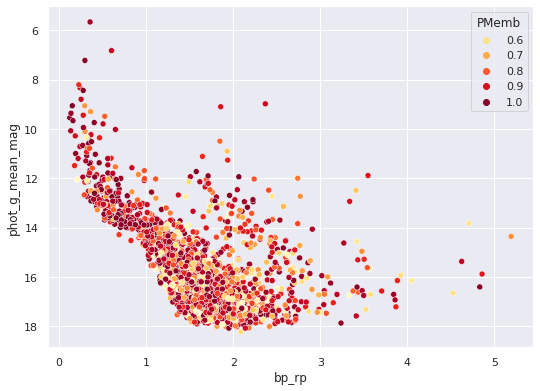

In [247]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

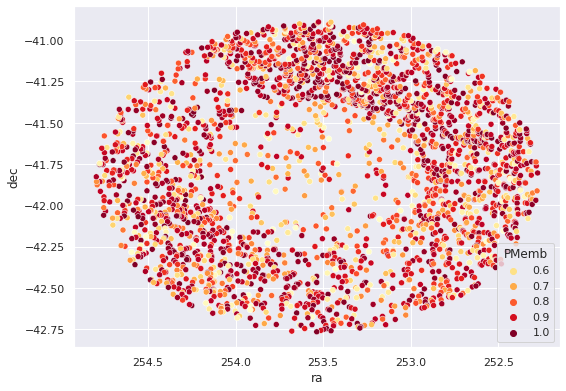

In [248]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

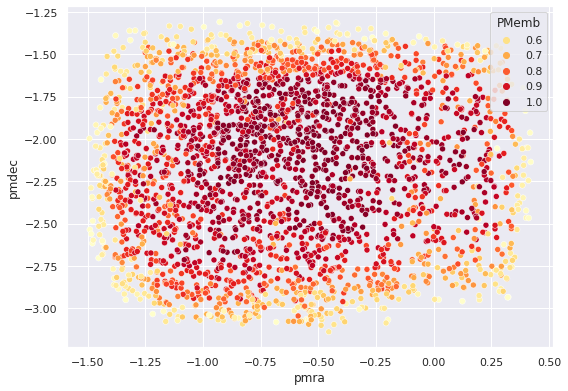

In [249]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


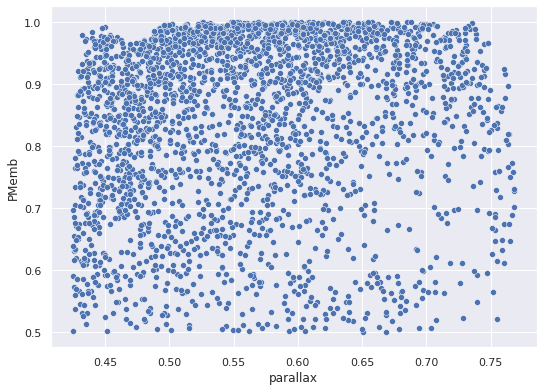

In [250]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [251]:
# saving the files as csv
# all_stars.to_csv('gaia_6231_membership_prob.csv')

potentialMember.to_csv('NGC_6231_membership_prob.csv')


### Comparing the old and new predicted members

In [252]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [253]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_6231_center,member,PMemb
count,4.064000e+03,4.064000e+03,4.064000e+03,4064.0,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.0,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000,...,4037.000000,4037.000000,4037.000000,4064.000000,4037.000000,4037.000000,4037.000000,61.000000,61.000000,4064.000000,61.000000,61.000000,61.000000,4064.000000,4064.000000,4064.000000,4064.000000,3134.000000,3134.000000,3134.000000,3134.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000,2090.0,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,4064.000000,4064.000000,4064.000000,4064.000000,4064.0,4064.000000
mean,1.635721e+18,5.967190e+18,8.555308e+08,2015.5,253.489622,0.073099,-41.771867,0.059969,0.568802,0.081837,8.936363,-0.621795,0.150499,-2.167508,0.105124,0.044714,-0.178378,-0.361346,-0.068171,-0.227306,0.007992,-0.729880,-0.129225,0.321361,-0.030629,203.703986,20.074065,202.300935,1.403051,1.629302,252.867294,0.087870,1.499118,31.0,39.286652,1.468881,0.014213,0.085277,23.248770,11.248278,...,413.297882,14.776738,1.340890,0.106791,1.579934,0.737636,0.842296,-27.433372,1.425015,0.071604,4819.672363,3.090164,-0.024590,343.479917,1.246998,257.040696,-19.073340,100093.653159,4830.832031,4632.519531,5148.810059,1.925356,1.619069,2.240682,0.968396,0.807714,1.132424,200111.0,3.424908,3.037014,3.709865,34.462254,29.665165,39.259453,0.532202,5.640630,26.307077,0.532204,1.0,0.735334
std,0.000000e+00,1.431262e+15,4.812329e+08,0.0,0.560722,0.033238,0.423475,0.026971,0.084945,0.038750,4.962783,0.433328,0.073338,0.426467,0.048848,0.183665,0.151057,0.173336,0.165651,0.158267,0.176117,0.075596,0.126392,0.138082,0.219496,26.830866,62.140545,26.443039,2.333387,5.193604,233.311188,0.138843,7.210465,0.0,81.550293,0.105308,0.006886,0.051184,3.058117,0.839947,...,346.686462,1.689700,0.117914,0.325189,0.600430,0.365033,0.254258,32.762544,2.184087,0.654819,438.109406,0.335512,0.192055,0.404371,0.436579,0.446615,0.419454,420.189607,1182.048340,1143.348877,1202.793945,0.708744,0.727556,0.725616,0.361970,0.367985,0.374414,0.0,4.058995,3.706497,4.319885,354.495850,304.658936,404.455505,0.273435,4.436069,14.574558,0.273426,0.0,0.259041
min,1.635721e+18,5.964910e+18,1.993672e+06,2015.5,252.276029,0.021023,-42.765151,0.018408,0.423228,0.023844,3.001050,-1.561498,0.042337,-3.138239,0.031957,-0.869595,-0.850281,-0.918631,-0.890320,-0.789838,-0.855959,-0.979477,-0.724401,-

In [254]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_6231_center,member
count,1.354000e+03,1.354000e+03,1.354000e+03,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,...,1347.000000,1347.000000,1347.000000,1354.000000,1347.000000,1347.000000,1347.000000,9.000000,9.000000,1354.000000,9.000000,9.000000,9.000000,1354.000000,1354.000000,1354.000000,1354.000000,1068.000000,1068.000000,1068.000000,1068.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,811.0,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.0
mean,1.635721e+18,5.966757e+18,8.643134e+08,2015.5,253.535883,0.066499,-41.796216,0.055566,0.583401,0.077106,9.969189,-0.581009,0.138488,-2.172717,0.098448,0.072449,-0.177469,-0.315211,-0.088598,-0.275319,-0.004994,-0.719266,-0.146822,0.365097,-0.000030,203.661004,36.044313,201.873708,1.787297,2.051913,270.559235,0.083740,1.554940,31.0,63.427616,1.490260,0.013432,0.093926,23.248154,11.200148,...,461.250977,14.278122,1.332238,0.121861,1.460608,0.674017,0.786590,-40.064345,2.654596,0.038405,4944.444336,3.055556,-0.166667,343.483758,1.205508,257.079965,-19.092692,100100.383895,5225.137695,5002.307617,5565.795410,1.841518,1.531017,2.149076,0.927435,0.765244,1.086938,200111.0,3.651327,3.259030,3.949239,68.250198,58.908226,77.592224,0.219791,5.728750,29.146004,0.521786,0.219810,1.0
std,0.000000e+00,1.042475e+15,4.736171e+08,0.0,0.225540,0.033183,0.193087,0.027528,0.078508,0.040418,5.288498,0.343077,0.076567,0.325692,0.051476,0.177117,0.150538,0.182438,0.149644,0.146635,0.160238,0.080739,0.125803,0.124043,0.229977,29.495980,80.394681,28.793315,2.925124,6.025174,307.027496,0.140059,9.858707,0.0,103.836403,0.124774,0.007334,0.055001,3.362835,0.887942,...,398.968384,1.985957,0.133295,0.338351,0.691354,0.408829,0.302204,43.334732,4.961407,0.512953,634.647766,0.166667,0.500000,0.168690,0.192644,0.182289,0.189425,434.526034,1389.434326,1346.609741,1420.679199,0.738869,0.755823,0.752854,0.375546,0.381554,0.387274,0.0,4.277451,3.951248,4.514437,534.412964,459.990906,609.025757,0.134632,4.056905,15.638530,0.308043,0.134652,0.0
min,1.635721e+18,5.964990e+18,1.993672e+06,2015.5,252.936062,0.021023,-42.281842,0.018408,0.423228,0.023844,3.001803,-1.561498,0.042337,-3.133929,0.031957,-0.869595,-0.850281,-0.911893,-0.867894,-0.750324,-0.807853,-0.971674,-0.709552,-0.299524,-0.8682

In [255]:
concatenated.dataset.value_counts()

New_member    2710
Old_member    1354
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

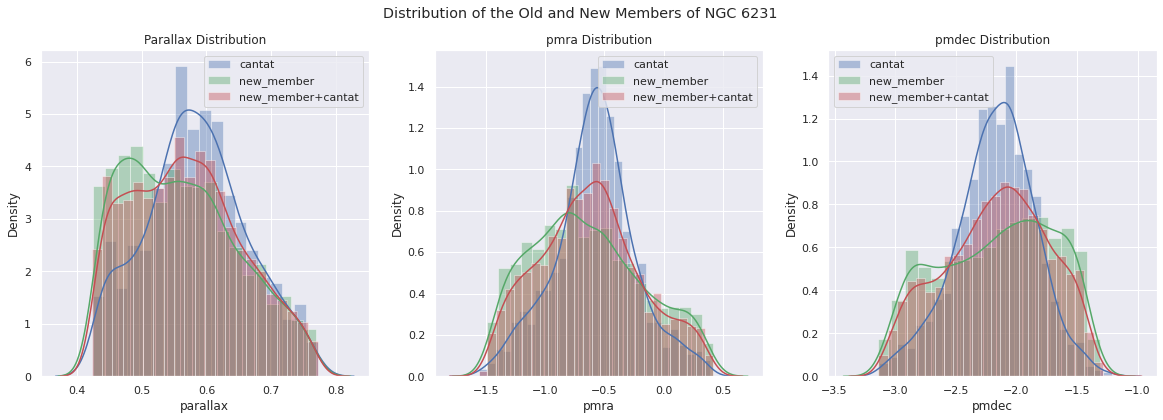

In [267]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6231')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


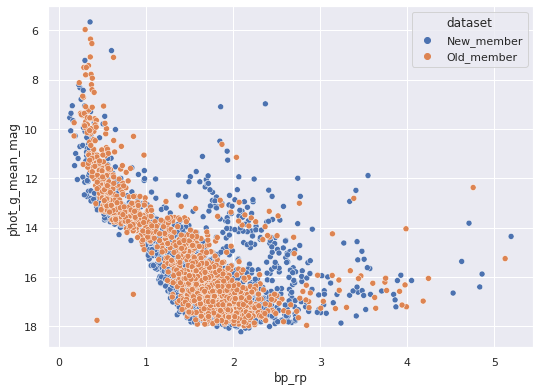

In [257]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

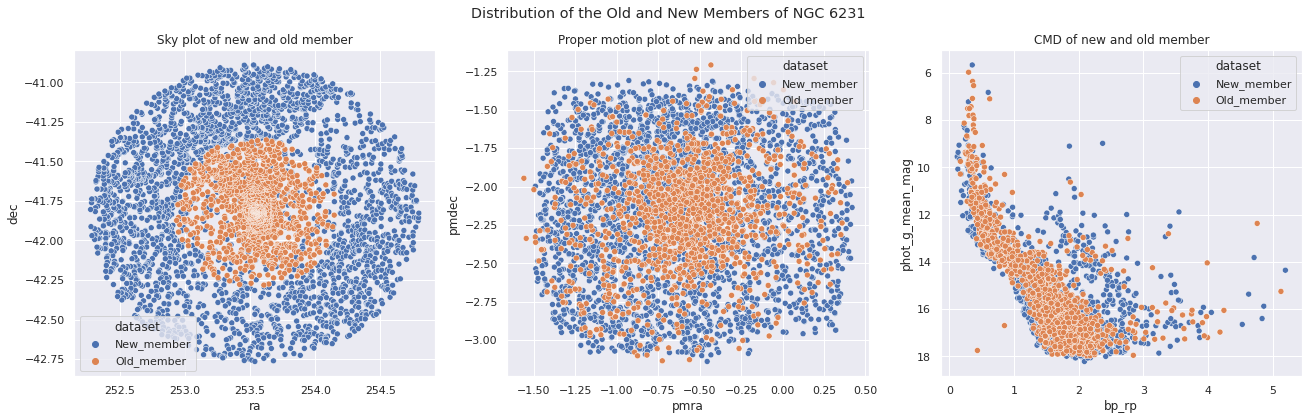

In [268]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 6231')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax=axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD of new and old member')

plt.show()

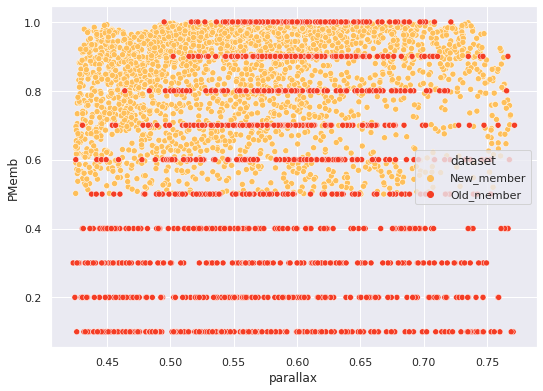

In [259]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [260]:
# pd_prof.ProfileReport(potentialMember)

In [261]:
#files.download('NGC_6231_cantat.csv')

#files.download('NGC_6231_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


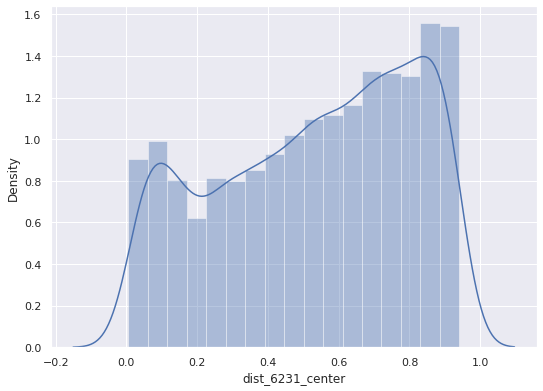

In [262]:
sns.distplot(concatenated['dist_6231_center'])

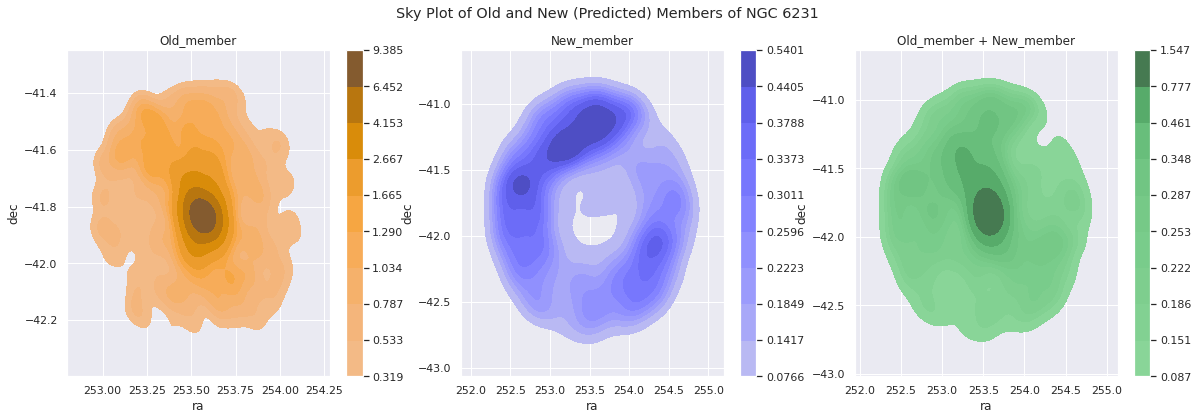

In [263]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 6231')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

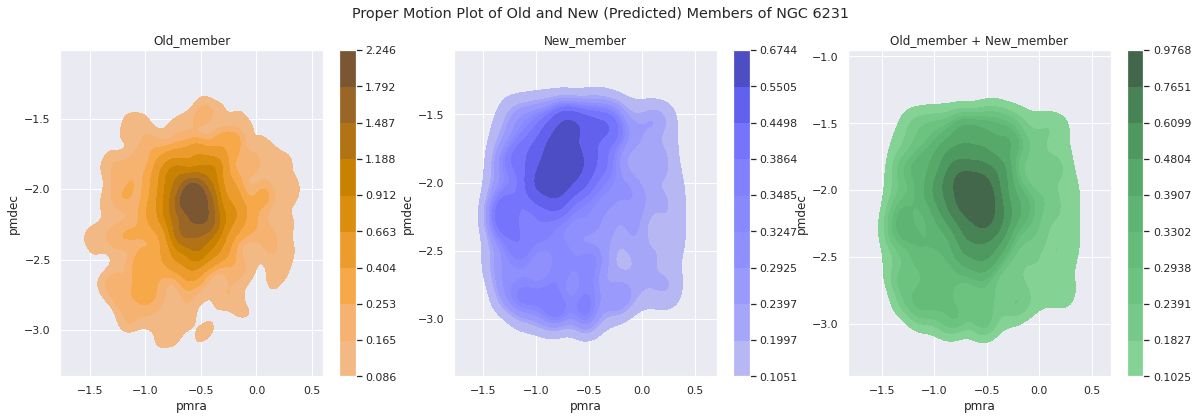

In [264]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 6231')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [265]:
#files.download('NGC_6231_cantat.csv')

potentialMember.to_csv('NGC_6231_additional_member_prob.csv')
concatenated.to_csv('NGC_6231_all_member_prob.csv')

files.download('NGC_6231_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_6231_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>